In [70]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import sys

In [75]:
df = pd.read_csv('HospitalAdmissionsData.csv')

In [7]:
### Column Headers

df.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [27]:
### floats/integers
df.dtypes.value_counts()

object     5
int64      4
float64    1
dtype: int64

In [38]:
## object features
df.dtypes[df.dtypes == ('O')]

Admission_Type    object
Insurance_Type    object
Religion_Type     object
Race              object
Dx                object
dtype: object

In [40]:
## insurance possible values

df['Insurance_Type'].unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [44]:
## admission length summary stats
df['AdmissionLengthDays'].describe()
df.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [55]:
## most common admission type, insurance type, religion type, race, and diagnosis 
at = list(df['Admission_Type'].value_counts().index)[0]
it = list(df['Insurance_Type'].value_counts().index)[0]
rt = list(df['Religion_Type'].value_counts().index)[0]
ra = list(df['Race'].value_counts().index)[0]
dx = list(df['Dx'].value_counts().index)[0]
print(at,it,rt,ra,dx)

emergency medicare catholic white newborn


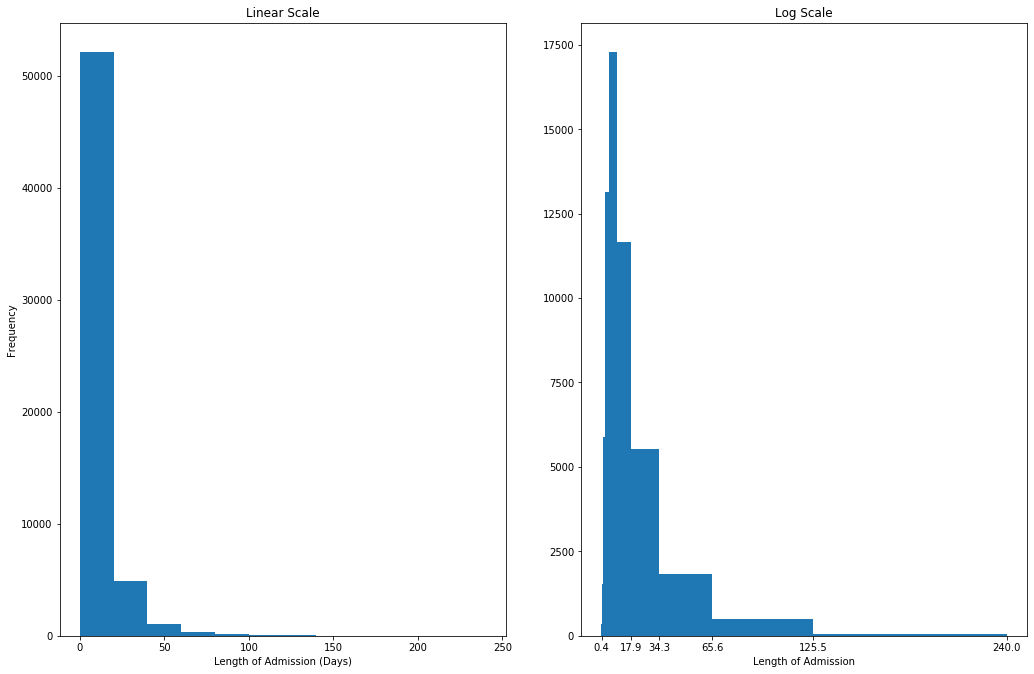

In [127]:
## histogram for admission days and also show histogram for admission days on a log scale.

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
n, bins, patches = ax1.hist(df['AdmissionLengthDays'],bins = range(0,260,20))
logbins = np.logspace(np.log10(.1),np.log10(bins[-1]),len(bins))
ax1.set_xlabel('Length of Admission (Days)')
ax1.set_ylabel('Frequency')
n, bins, patches = ax2.hist(df['AdmissionLengthDays'],bins =logbins)
ax2.set_xlabel('Length of Admission')
ax2.set_title('Log Scale')
ax1.set_title('Linear Scale')
lbs = [logbins[2]] + list(logbins[8:])
ax2.set_xticks(lbs)
fig.tight_layout(pad=3.0)
### the histogram is heeavily skewed right as nearly all of the data falls in the first few bins
## as most of the hospital stays are short

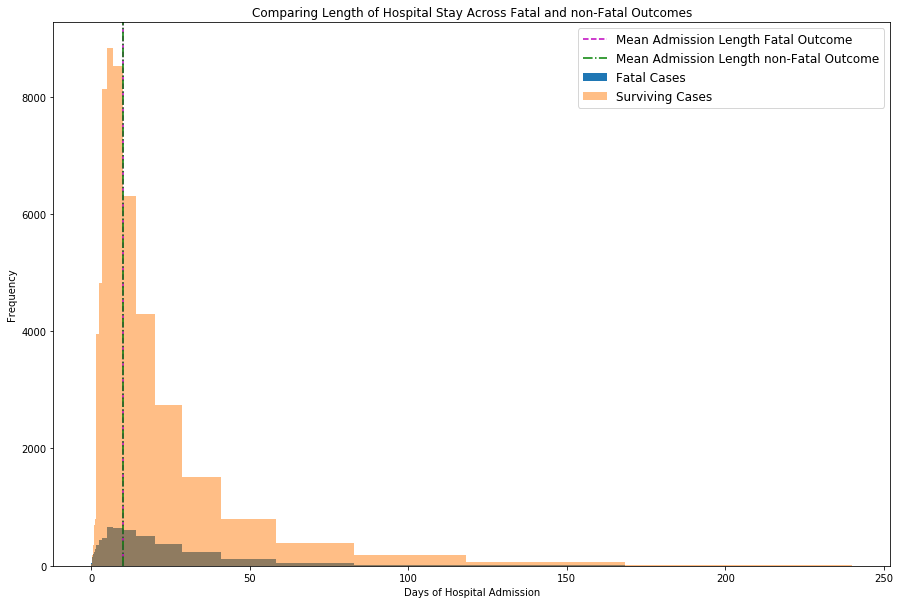

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [160]:
#### mean admission days of those who died vs lived
df.head()
dead = df['AdmissionLengthDays'][df['Death_1'] == 1]
alive = df['AdmissionLengthDays'][df['Death_1'] != 1]
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
newbins = np.logspace(np.log10(.1),np.log10(bins[-1]),len(bins) + 10)
plt.hist(dead, newbins, alpha=1, label='Fatal Cases')
plt.hist(alive, newbins, alpha=0.5, label='Surviving Cases')
plt.xlabel('Days of Hospital Admission')
plt.ylabel('Frequency')
plt.title('Comparing Length of Hospital Stay Across Fatal and non-Fatal Outcomes')
plt.axvline(dead.mean(),color = 'm',ls = '--',label = 'Mean Admission Length Fatal Outcome')
plt.axvline(alive.mean(),color='g',ls = '-.',label = 'Mean Admission Length non-Fatal Outcome')
plt.legend(loc='upper right',fontsize='large')
plt.show()

### mean number of days for both cases are essentially overlayed, both green and magenta lines are visible and nearly 
### at same x-value

mean_dead = dead.mean()
mean_alive = alive.mean()
df['Insurance_Type'].unique()

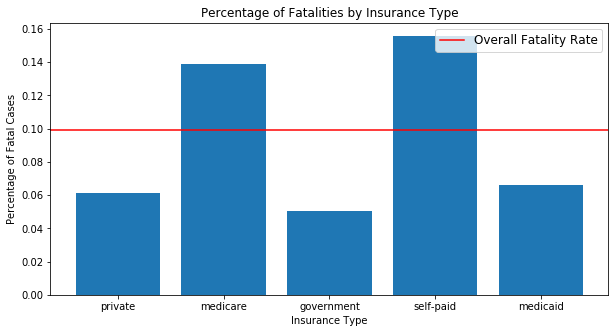

In [173]:
### Death and insurance type association

priv = df['Death_1'][df['Insurance_Type'] == 'private'].sum()/len(df['Death_1'][df['Insurance_Type'] == 'private'])
medicare = df['Death_1'][df['Insurance_Type'] == 'medicare'].sum()/len(df['Death_1'][df['Insurance_Type'] == 'medicare'])
gov = df['Death_1'][df['Insurance_Type'] == 'government'].sum()/len(df['Death_1'][df['Insurance_Type'] == 'government'])
self = df['Death_1'][df['Insurance_Type'] == 'self pay'].sum()/len(df['Death_1'][df['Insurance_Type'] == 'self pay'])
medicaid = df['Death_1'][df['Insurance_Type'] == 'medicaid'].sum()/len(df['Death_1'][df['Insurance_Type'] == 'medicaid'])
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
plt.bar(['private','medicare','government','self-paid','medicaid'],[priv,medicare,gov,self,medicaid])
plt.title('Percentage of Fatalities by Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Percentage of Fatal Cases')
overallrate = df['Death_1'].sum()/len(df)
plt.axhline(overallrate,color = 'r',label = 'Overall Fatality Rate')
plt.legend(loc='upper right',fontsize='large')

# Self paid and medicare insurance correlate to higher death rates well above the overall rate while medicaid, government
# and private insurance are all well below the overall rate